In [1]:
import pandas as pd
import json
import os
import statsmodels.stats.weightstats as sms
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns

import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import numpy as np

import csv

### Read Files

Read in all files from 10nw (then 10w, 5nw, and 5w) 1000x expansions

In [2]:
#Directory path
dirpath = "results/formatted/10nw_random/"

In [5]:
#Read in all files, append total number of compounds to a numpy array
def total_expansion_size(classifier):
    dirpath = "results/formatted/" + classifier + "/"
    size = []
    weird_seed_set = [] #seed sets that result in larger than expected (>805) expansions
    weird_compounds = [] #all compounds from analyses which result in larger than expected expansions
    for file in os.listdir(dirpath):
        if file.endswith(".json"):
            with open(dirpath + file) as f:
                datajson = json.load(f)
            generations = pd.DataFrame(datajson["generations"])
            generations = generations.transpose()
            generations.index = generations.index.astype(int)
            generations = generations.sort_index()

            original_columns = generations.columns
            for col in original_columns:
                generations["n_"+col] = generations[col].str.len()
            s = generations["n_compounds_cumulative"].iloc[-1]
            size.append(s)
            if (s) > 805:
                print(s)
                weird_seed_set.append(generations["compounds_cumulative"].iloc[0])
                weird_compounds.append(generations["compounds_cumulative"].iloc[-1])
    return size, weird_seed_set, weird_compounds
    

In [6]:
#ALL seed set size
dirpath = "results/formatted/ALL/"
file = "enc_exp_messedUpApparte.json"
full_expansion_compounds = []
with open(dirpath + file) as f:
    datajson = json.load(f)
    generations = pd.DataFrame(datajson["generations"])
    generations = generations.transpose()
    generations.index = generations.index.astype(int)
    generations = generations.sort_index()
    
    original_columns = generations.columns
    for col in original_columns:
        generations["n_"+col] = generations[col].str.len()
    #print(generations.head())
    print(generations["n_compounds_cumulative"].iloc[-1])
    full_expansion_compounds.append(generations["compounds_cumulative"].iloc[-1])
print(full_expansion_compounds[0])

807
[u'C00001', u'C00080', u'C00007', u'C02107', u'C00506', u'C00026', u'C03826', u'C00383', u'C02091', u'C00048', u'C00108', u'C07272', u'C01326', u'C00957', u'C01424', u'C00132', u'C03576', u'C00025', u'C00704', u'C01732', u'C00036', u'C05585', u'C00051', u'C00067', u'C02923', u'C00262', u'C00094', u'C00014', u'C00546', u'C00097', u'C05578', u'C08538', u'C00652', u'C00543', u'C00037', u'C00065', u'C00155', u'C00064', u'C00587', u'C00288', u'C00334', u'C00022', u'C00898', u'C01180', u'C00879', u'C00082', u'C06160', u'C00148', u'C00152', u'C05933', u'C00483', u'C00555', u'C05359', u'C00388', u'C21474', u'C00178', u'C00408', u'C18215', u'C00047', u'C01987', u'C02501', u'C00642', u'C00134', u'C06010', u'C00196', u'C07086', u'C02647', u'C11505', u'C02526', u'C00398', u'C00042', u'C00135', u'C02350', u'C03030', u'C00106', u'C00027', u'C19714', u'C00078', u'C16519', u'C00213', u'C00033', u'C00041', u'C00109', u'C00222', u'C00088', u'C04390', u'C00079', u'C00062', u'C02470', u'C02167', u'C16

In [10]:
#Get total expansion sizes for each classification
# #note - will take a few minutes
# exp_10w, weird_ss_10w, weird_cpds_10w = total_expansion_size("10w")
# #exp_10nw, weird_ss_10nw, weird_cpds_10nw = total_expansion_size("10nw")
# exp_5w, weird_ss_5w, weird_cpds_5w = total_expansion_size("5w")
# exp_5nw, weird_ss_5nw, weird_cpds_5nw = total_expansion_size("5nw")

#TODO: read in total expansion size
#exp_10nw, weird_ss_10nw, weird_cpds_10nw = total_expansion_size("10nw")

#Total expansion side for 10nw_random
exp_10nw_random, weird_ss_10nw_random, weird_cpds_10nw_random = total_expansion_size("10nw_random")
exp_10nw_fixed, weird_ss_10nw_fixed, weird_cpds_10nw_fixed = total_expansion_size("10nw_fixed")

        

814
812
818
815
815
815
814
813


In [11]:
print(len(exp_10nw_random))
print(len(exp_10nw_fixed))

1000
1000


### Analyze

Analyze the number of full expansions found in each

In [6]:
#Convert them all into numpy arrays
exp_10w = np.array(exp_10w)
exp_10nw = np.array(exp_10nw)
exp_5w = np.array(exp_5w)
exp_5nw = np.array(exp_5nw)
#print(exp_ALL)

In [12]:
#Revision analysis
exp_10nw_random = np.array(exp_10nw_random)
exp_10nw_fixed = np.array(exp_10nw_fixed)

805


<function matplotlib.pyplot.show>

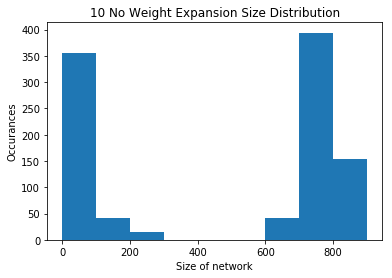

In [7]:
#Plot the distribution of each array (before they are changed in the binary() function)
print(np.max(exp_10nw))
plt.hist(exp_10nw, bins=[0,100,200,300,400,500,600,700,800,900])
plt.title("10 No Weight Expansion Size Distribution")
plt.xlabel("Size of network")
plt.ylabel("Occurances")
plt.show

<function matplotlib.pyplot.show>

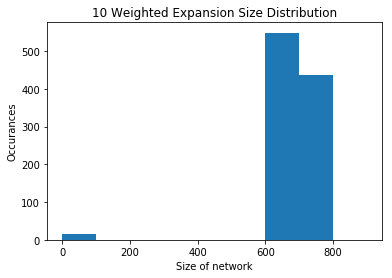

In [8]:
plt.hist(exp_10w, bins=[0,100,200,300,400,500,600,700,800,900])
plt.title("10 Weighted Expansion Size Distribution")
plt.xlabel("Size of network")
plt.ylabel("Occurances")
plt.show

<function matplotlib.pyplot.show>

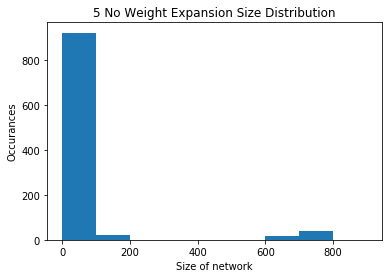

In [9]:
plt.hist(exp_5nw, bins=[0,100,200,300,400,500,600,700,800,900])
plt.title("5 No Weight Expansion Size Distribution")
plt.xlabel("Size of network")
plt.ylabel("Occurances")
plt.show

<function matplotlib.pyplot.show>

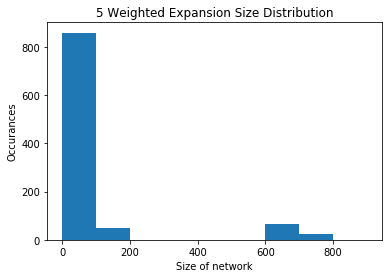

In [10]:
plt.hist(exp_5w, bins=[0,100,200,300,400,500,600,700,800,900])
plt.title("5 Weighted Expansion Size Distribution")
plt.xlabel("Size of network")
plt.ylabel("Occurances")
plt.show

<function matplotlib.pyplot.show>

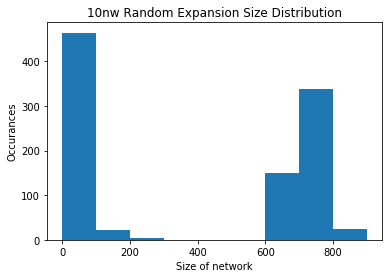

In [15]:
#Revision graphs
plt.hist(exp_10nw_random, bins=[0,100,200,300,400,500,600,700,800,900])
plt.title("10nw Random Expansion Size Distribution")
plt.xlabel("Size of network")
plt.ylabel("Occurances")
plt.show

<function matplotlib.pyplot.show>

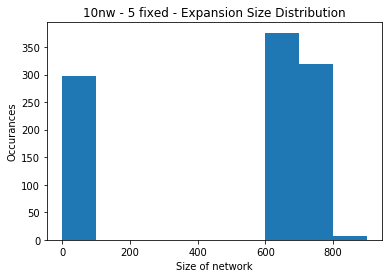

In [16]:
#Revision graph (again)
plt.hist(exp_10nw_fixed, bins=[0,100,200,300,400,500,600,700,800,900])
plt.title("10nw - 5 fixed - Expansion Size Distribution")
plt.xlabel("Size of network")
plt.ylabel("Occurances")
plt.show

In [14]:
#How many of each expansion reached a full expansion (807 compounds)
def max_size(array):
    count = 0
    for s in array:
        if s > 805:
            print(s)
            count+=1
    print(count)

In [12]:
#Did any of the expansions reach the maximum expansion (answer - only 1)
max_size(exp_10w)
max_size(exp_10nw)
max_size(exp_5w)
max_size(exp_5nw)

0
0
0
0


### Problem

10/21: 10nw analysis is showing 5 expansions above 805 compounds, which should be impossible. Which seed sets are those?

In [15]:
#dataframe to translate from KEGG ID to compound name
cpd_name_df = pd.read_csv("accessible_compounds.csv")

In [16]:
#Which seed sets are found in > 805 expansions
weird_ss_names = []
for s in weird_ss_10nw:
    for cpd in s: 
        print(cpd_name_df['Name'].loc[cpd_name_df["Compound"] == cpd].iloc[0])
        weird_ss_names.append(cpd_name_df['Name'].loc[cpd_name_df["Compound"] == cpd].iloc[0])
    print(" ")

#counter object for weird cpd names
weird_ss_counter = Counter(weird_ss_names)
print(weird_ss_counter)
            

H2O
Hydrogen cyanide
Formaldehyde
Benzene
Hydrogen sulfide
CO
Ethanol
Propane
Methane
Ethylene oxide
 
H2O
Formaldehyde
Ammonia
Benzene
Hydrogen sulfide
Ethanol
Propane
Methane
Ethylene oxide
Acetylene
 
H2O
Hydrogen cyanide
Formaldehyde
Benzene
Hydrogen sulfide
CO2
Ethanol
Propane
Methane
Ethylene oxide
 
Hydrogen cyanide
Methanol
Propylene
Benzene
Hydrogen sulfide
CO2
Ethanol
Propane
Methane
Ethylene oxide
 
Hydrogen cyanide
Methanol
Benzene
Hydrogen sulfide
CO2
Ethanol
Propane
Methane
Ethylene oxide
Acetylene
 
Counter({'Benzene': 5, 'Ethylene oxide': 5, 'Propane': 5, 'Hydrogen sulfide': 5, 'Ethanol': 5, 'Methane': 5, 'Hydrogen cyanide': 4, 'H2O': 3, 'CO2': 3, 'Formaldehyde': 3, 'Acetylene': 2, 'Methanol': 2, 'CO': 1, 'Propylene': 1, 'Ammonia': 1})


In [17]:
#Which new compounds are being generated?

for cpd_list in weird_cpds_10nw:
    #print the difference between the compounds here and the full list generated by the 18-cpd seed set
    diff = list((set(cpd_list) - set(full_expansion_compounds[0])))
    print(diff)
    for cpd in diff:
        print(cpd_name_df['Name'].loc[cpd_name_df["Compound"] == cpd].iloc[0])

[]
[]
[]
[]
[]


In [17]:
#1 if expansion is greater than 500, 0 otherwise
def binary(array):
    with np.nditer(array, op_flags=['readwrite']) as et:
        for e in et:
            if e >= 500:
                e[...] = 1
            else:
                e[...] = 0
    return array

In [14]:
#Find each full expansion
bin_10w = binary(exp_10w)
bin_10nw = binary(exp_10nw)
bin_5w = binary(exp_5w)
bin_5nw = binary(exp_5nw)

In [18]:
#Revised full expansion
bin_10nw_random = binary(exp_10nw_random)
bin_10nw_fixed = binary(exp_10nw_fixed)

In [19]:
#Randomly sample 100 times from each distribution
def sample(bin_array):
    sample = []
    for i in range(100):
        sample.append(np.sum(np.random.choice(bin_array, 100)))

    return sample

In [17]:
#100 random samples from each distribution
sample_10w = np.asarray(sample(bin_10w))
sample_10nw = np.asarray(sample(bin_10nw))
sample_5w = np.asarray(sample(bin_5w))
sample_5nw = np.asarray(sample(bin_5nw))

In [20]:
#Revised sampling
sample_10nw_random = np.asarray(sample(bin_10nw_random))
sample_10nw_fixed = np.asarray(sample(bin_10nw_fixed))


In [18]:
#95% confidence interval for each
print("10w \n----\nMean: " + str(np.mean(sample_10w)) + "\nConfidence Range: " + str(sms.DescrStatsW(sample_10w).tconfint_mean(alpha=0.05)) + "\n\n")
print("10nw \n----\nMean: " + str(np.mean(sample_10nw)) + "\nConfidence Range: " + str(sms.DescrStatsW(sample_10nw).tconfint_mean(alpha=0.05)) + "\n\n")
print("5w \n----\nMean: " + str(np.mean(sample_5w)) + "\nConfidence Range: " + str(sms.DescrStatsW(sample_5w).tconfint_mean(alpha=0.05)) + "\n\n")
print("5nw \n----\nMean: " + str(np.mean(sample_5nw)) + "\nConfidence Range: " + str(sms.DescrStatsW(sample_5nw).tconfint_mean(alpha=0.05)) + "\n\n")

10w 
----
Mean: 98.46
Confidence Range: (98.20241435956376, 98.71758564043623)


10nw 
----
Mean: 58.92
Confidence Range: (57.949705184362394, 59.89029481563761)


5w 
----
Mean: 9.45
Confidence Range: (8.895641047922645, 10.004358952077354)


5nw 
----
Mean: 5.6
Confidence Range: (5.120558661137856, 6.079441338862143)




In [21]:
#Revised 95% confidence interval for each
print("10nw random \n----\nMean: " + str(np.mean(sample_10nw_random)) + "\nConfidence Range: " + str(sms.DescrStatsW(sample_10nw_random).tconfint_mean(alpha=0.05)) + "\n\n")
print("10nw fixed \n----\nMean: " + str(np.mean(sample_10nw_fixed)) + "\nConfidence Range: " + str(sms.DescrStatsW(sample_10nw_fixed).tconfint_mean(alpha=0.05)) + "\n\n")


10nw random 
----
Mean: 50.92
Confidence Range: (49.914283728491995, 51.92571627150801)


10nw fixed 
----
Mean: 69.3
Confidence Range: (68.37424685629657, 70.22575314370343)


